## Entrenamiento 2

### Cargar datos

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv('../dataset/data/sample_3M_cod.csv')

# Cargar el archivo CSV en un DataFrame de pandas
#df = pd.read_csv('dataset/data/sample_150K_cod.csv')

y = df.AttackCod

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 44 columns):
 #   Column                       Dtype
---  ------                       -----
 0   L4_SRC_PORT                  int64
 1   L4_DST_PORT                  int64
 2   PROTOCOL                     int64
 3   L7_PROTO                     int64
 4   IN_BYTES                     int64
 5   IN_PKTS                      int64
 6   OUT_BYTES                    int64
 7   OUT_PKTS                     int64
 8   TCP_FLAGS                    int64
 9   CLIENT_TCP_FLAGS             int64
 10  SERVER_TCP_FLAGS             int64
 11  FLOW_DURATION_MILLISECONDS   int64
 12  DURATION_IN                  int64
 13  DURATION_OUT                 int64
 14  MIN_TTL                      int64
 15  MAX_TTL                      int64
 16  LONGEST_FLOW_PKT             int64
 17  SHORTEST_FLOW_PKT            int64
 18  MIN_IP_PKT_LEN               int64
 19  MAX_IP_PKT_LEN               int64
 20  SR

In [2]:
NIDS_features = ['LONGEST_FLOW_PKT','TCP_FLAGS','CLIENT_TCP_FLAGS','MAX_IP_PKT_LEN', 'IN_BYTES', 'L7_PROTO', 'TCP_WIN_MAX_IN', 'NUM_PKTS_UP_TO_128_BYTES', 'MIN_TTL', 'MAX_TTL', 'NUM_PKTS_128_TO_256_BYTES','MIN_IP_PKT_LEN', 
'DNS_QUERY_ID','DURATION_IN', 'FLOW_DURATION_MILLISECONDS', 'RETRANSMITTED_IN_PKTS']

X = df_150K[NIDS_features]

# Escalamos solo las características (X) y no las etiquetas (y)
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

# tomamos las caracteristicas escaladas y las convertimso nuevamente a un dataframe
X = pd.DataFrame(X_sc, columns=NIDS_features)

X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151927 entries, 0 to 151926
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   LONGEST_FLOW_PKT            151927 non-null  float64
 1   TCP_FLAGS                   151927 non-null  float64
 2   CLIENT_TCP_FLAGS            151927 non-null  float64
 3   MAX_IP_PKT_LEN              151927 non-null  float64
 4   IN_BYTES                    151927 non-null  float64
 5   L7_PROTO                    151927 non-null  float64
 6   TCP_WIN_MAX_IN              151927 non-null  float64
 7   NUM_PKTS_UP_TO_128_BYTES    151927 non-null  float64
 8   MIN_TTL                     151927 non-null  float64
 9   MAX_TTL                     151927 non-null  float64
 10  NUM_PKTS_128_TO_256_BYTES   151927 non-null  float64
 11  MIN_IP_PKT_LEN              151927 non-null  float64
 12  DNS_QUERY_ID                151927 non-null  float64
 13  DURATION_IN   

,LONGEST_FLOW_PKT,TCP_FLAGS,CLIENT_TCP_FLAGS,MAX_IP_PKT_LEN,IN_BYTES,L7_PROTO,TCP_WIN_MAX_IN,NUM_PKTS_UP_TO_128_BYTES,MIN_TTL,MAX_TTL,NUM_PKTS_128_TO_256_BYTES,MIN_IP_PKT_LEN,DNS_QUERY_ID,DURATION_IN,FLOW_DURATION_MILLISECONDS,RETRANSMITTED_IN_PKTS
0,0.009912,0.000000,0.000000,0.009912,0.000006,0.000000,0.000000,0.000011,0.996078,0.996078,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,0.009912,0.000000,0.000000,0.009912,0.000006,0.000000,0.000000,0.000011,0.996078,0.996078,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,0.061949,0.121076,0.121076,0.061949,0.000026,0.028571,0.249989,0.000076,0.243137,0.247059,0.000604,0.094787,0.0,0.0,0.0,0.001812
3,0.054378,0.121076,0.121076,0.054378,0.000025,0.028571,0.249989,0.000076,0.243137,0.247059,0.000604,0.094787,0.0,0.0,0.0,0.001812
4,0.002753,0.098655,0.008969,0.002753,0.000046,0.534694,0.125002,0.000326,0.501961,0.501961,0.000000,0.094787,0.0,0.0,0.0,0.000000


### Ejemplo Reshape

In [ ]:
X = X.values.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

Vamos a descomponer el código proporcionado y explicarlo con un ejemplo concreto.

El código está transformando un conjunto de datos X en una nueva forma que es adecuada para modelos que toman entradas secuenciales, como las redes neuronales recurrentes (RNNs).

El comentario menciona:
##### Reajustar X para que sea (num_samples, time_steps, features_per_step)

Esto sugiere que el conjunto de datos X se está reajustando para tener 3 dimensiones:

num_samples: El número total de muestras o registros en el conjunto de datos.
time_steps: La longitud de la secuencia para cada muestra.
features_per_step: El número de características en cada paso de tiempo.
Vamos a considerar un ejemplo:

Supongamos que X es un DataFrame de pandas que representa las temperaturas diarias de una ciudad durante 10 días. Aquí está una representación simplificada:

css
Copy code
Día 1 | Día 2 | Día 3 | ... | Día 10
-----------------------------------
  20  |  21  |  22  | ... |   18
  21  |  20  |  23  | ... |   17
  ...
(número de muestras/registros)
Si X tiene 100 muestras (registros de diferentes ciudades o periodos, por ejemplo) y 10 características (temperaturas de 10 días), la forma original de X sería (100, 10).

Ahora, supongamos que deseas alimentar estos datos a una RNN para predecir la temperatura del día siguiente. La RNN esperaría una entrada tridimensional donde cada paso de tiempo (cada día, en este caso) tiene un conjunto de características.

Dado que estamos tratando solo con temperaturas (una característica), features_per_step es 1.

El código X = X.values.reshape(X.shape[0], X.shape[1], 1) realiza esta transformación. Después de ejecutar este código, X tendría la forma (100, 10, 1).

El resultado es un tensor tridimensional donde:

Hay 100 muestras (ciudades o periodos).
Cada muestra tiene una secuencia de 10 pasos de tiempo (10 días).
En cada paso de tiempo, hay una característica (la temperatura).
El print(X.shape) simplemente imprimirá (100, 10, 1) para confirmar la nueva forma.

### Codigo modelo LSTM 2capas +capa densa (60%)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K

# Supongamos que X es tu dataset con 16 características y AttackCod es tu variable objetivo
# X = tu_data
# AttackCod = tu_etiqueta



# Asignar la columna de etiquetas a AttackCod
AttackCod = df['AttackCod'].values

NIDS_features = ['LONGEST_FLOW_PKT','TCP_FLAGS','CLIENT_TCP_FLAGS','MAX_IP_PKT_LEN', 'IN_BYTES', 'L7_PROTO', 'TCP_WIN_MAX_IN', 'NUM_PKTS_UP_TO_128_BYTES',
                 'MIN_TTL', 'MAX_TTL', 'NUM_PKTS_128_TO_256_BYTES','MIN_IP_PKT_LEN', 
                'DNS_QUERY_ID','DURATION_IN', 'FLOW_DURATION_MILLISECONDS', 'RETRANSMITTED_IN_PKTS']

X = df[NIDS_features]

# Escalamos solo las características (X) y no las etiquetas (y)
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

# tomamos las caracteristicas escaladas y las convertimso nuevamente a un dataframe
X = pd.DataFrame(X_sc, columns=NIDS_features)

# Codificar la variable objetivo de manera ordinal
label_encoder = LabelEncoder()
AttackCod_encoded = label_encoder.fit_transform(AttackCod)  # Transforma las etiquetas a 0, 1, 2
y = AttackCod_encoded / 2.0  # Convierte a 0, 0.5, 1

# Reajustar X para que sea (num_samples, time_steps, features_per_step)
X = X.values.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

# Dividir datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definición del modelo
model = keras.Sequential([
    layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(X.shape[1], 1), dropout=0.2),
   
    layers.LSTM(32, activation='relu', dropout=0.2),
    
    layers.Dense(1, activation='sigmoid')  # Solo 1 neurona con activación sigmoid
])

# Definir la métrica F1-score
def f1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision_value = precision(y_true, y_pred)
    recall_value = recall(y_true, y_pred)
    return 2*((precision_value*recall_value)/(precision_value+recall_value+K.epsilon()))

# Compilar modelo con las métricas adicionales
model.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), f1_score])

# Resumen del modelo
model.summary()

# Entrenar modelo
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=250)

# Post-procesamiento para obtener las clases
y_pred = model.predict(X_test)
y_pred_class = np.where(y_pred < 0.25, 0, np.where(y_pred < 0.75, 1, 2))

# Convertir clases numéricas a etiquetas originales
y_pred_labels = label_encoder.inverse_transform(y_pred_class)

# Convertir clases numéricas a etiquetas originales
y_pred_labels = label_encoder.inverse_transform(y_pred_class.reshape(-1))

NameError: name 'df' is not defined

### Estrategia de mejora

En general, el código parece estar bastante bien estructurado, pero hay algunas observaciones y correcciones que podrían ser pertinentes:

ReLU en LSTM: Se debe tener cuidado con la activación ReLU en las capas LSTM, ya que puede llevar a la explosión del gradiente. A menudo, es preferible no especificar una función de activación (lo que implica tanh por defecto).

División de clases: La forma en que estás dividiendo tus clases es interesante. Estás tomando tu variable objetivo, codificándola en valores 0, 1, 2 y luego dividiéndola por 2 para obtener 0, 0.5, 1. Más adelante, usas umbrales 0.25 y 0.75 para categorizar nuevamente tus predicciones. Asegúrate de que esta es la intención deseada.

Precaución al cambiar la forma de X: Estás usando X = X.values.reshape(X.shape[0], X.shape[1], 1), lo que está bien para tu caso, pero asegúrate de que esta es la estructura deseada para tus datos cuando entrenes un modelo LSTM.

Métrica F1-score: Es genial que estés definiendo tu métrica F1. Sin embargo, si tu intención es usarla para un problema de clasificación multiclase, entonces deberías adaptarla para tal caso. Actualmente, parece estar diseñada para un problema binario.



In [ ]:

#Aquí está el código con algunos cambios:

# ... [Mismo código previo]

# Dividir datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definición del modelo
model = keras.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1), dropout=0.2),
    layers.LSTM(32, dropout=0.2),
    layers.Dense(1, activation='sigmoid')  # Solo 1 neurona con activación sigmoid
])

# ... [Mismo código de métrica F1-score]

# Compilar modelo con las métricas adicionales
model.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), f1_score])

# Resumen del modelo
model.summary()

# Entrenar modelo
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Post-procesamiento para obtener las clases
y_pred = model.predict(X_test)
y_pred_class = np.where(y_pred < 0.25, 0, np.where(y_pred < 0.75, 1, 2))

# Convertir clases numéricas a etiquetas originales
y_pred_labels = label_encoder.inverse_transform(y_pred_class.reshape(-1))


Finalmente, ten en cuenta que la métrica F1-score es una métrica general y podría no ser la mejor opción para todos los problemas. Es una buena idea entender tus datos y elegir o diseñar una métrica que tenga sentido para tu aplicación específica.

### LSTM + dropout (98.66%)

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Asignar la columna de etiquetas a AttackCod
AttackCod = df['AttackCod'].values

NIDS_features = ['L4_SRC_PORT','L4_DST_PORT', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
    'DURATION_IN', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT','SHORTEST_FLOW_PKT', 'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES',
    'DST_TO_SRC_SECOND_BYTES', 'SRC_TO_DST_AVG_THROUGHPUT','DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES','TCP_WIN_MAX_IN']  # Mantengo la lista de características como estaba

X = df[NIDS_features]

# Escalamos solo las características (X) y no las etiquetas (y)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir datos
X_train, X_temp, y_train, y_temp = train_test_split(X, AttackCod, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definición del modelo
model = keras.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1), dropout=0.1),
    layers.LSTM(32, dropout=0.1),
    layers.Dense(3, activation='sigmoid')
])

# Adaptación de la métrica F1 para multiclase
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return K.mean(f1_val)

# Compilar modelo con las métricas adicionales
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_metric])

# Resumen del modelo
model.summary()

# Entrenar modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=240)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"AccuracyTest: {accuracy*100:.2f}%")


# Post-procesamiento para obtener las clases
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 29411 (114.89 KB)
Trainable params: 29411 (114.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
8750/8750 [==============================] - 308s 35ms/step - loss: 0.3044 - accuracy: 0.8850 - f1_metric: 0.6979 - val_loss: 0.4944 - val_accuracy: 0.6805 - val_f1_metric: 0.7078
Epoch 2/10
8750/8750 [==============================] - 320s 37ms/step - loss: 0.1973 - acc

ValueError: too many values to unpack (expected 2)

### LSTM 3 capas 15 neuronas 96.55%

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20, 15)            1020      
                                                                 
 lstm_3 (LSTM)               (None, 20, 15)            1860      
                                                                 
 lstm_4 (LSTM)               (None, 15)                1860      
                                                                 
 dense_1 (Dense)             (None, 3)                 48        
                                                                 
Total params: 4788 (18.70 KB)
Trainable params: 4788 (18.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
8750/8750 [==============================] - 143s 16ms/step - loss: 0.3328 - accuracy: 0.8769 - f1_metric: 0.6711 - val_loss: 0.8326 - val_ac

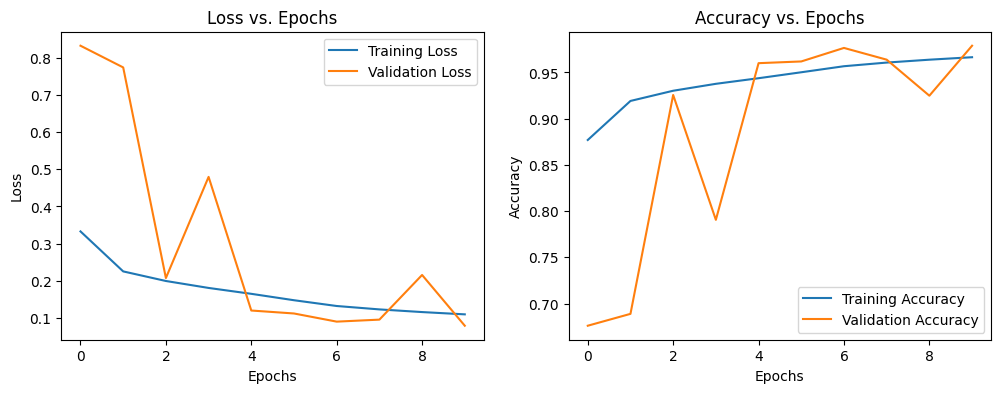

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Asignar la columna de etiquetas a AttackCod
AttackCod = df['AttackCod'].values

NIDS_features = ['L4_SRC_PORT','L4_DST_PORT', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
    'DURATION_IN', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT','SHORTEST_FLOW_PKT', 'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES',
    'DST_TO_SRC_SECOND_BYTES', 'SRC_TO_DST_AVG_THROUGHPUT','DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES','TCP_WIN_MAX_IN']  # Mantengo la lista de características como estaba

X = df[NIDS_features]

# Escalamos solo las características (X) y no las etiquetas (y)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir datos
X_train, X_temp, y_train, y_temp = train_test_split(X, AttackCod, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definición del modelo
model = keras.Sequential([
    # Primera capa LSTM con 15 neuronas, retornando secuencias para alimentar la siguiente capa LSTM
    layers.LSTM(15, return_sequences=True, input_shape=(X_train.shape[1], 1), dropout=0.2),
        # Segunda capa LSTM con 15 neuronas, también retornando secuencias
    layers.LSTM(15, return_sequences=True, dropout=0.2),
    # Tercera capa LSTM con 15 neuronas, esta vez no retorna secuencias ya que es la última capa LSTM
    layers.LSTM(15, dropout=0.2),
    # Capa de salida con 3 neuronas para la clasificación o predicción
    layers.Dense(3, activation='sigmoid')
])

# Adaptación de la métrica F1 para multiclase
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return K.mean(f1_val)

# Compilar modelo con las métricas adicionales
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_metric])

# Resumen del modelo
model.summary()

# Entrenar modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=240)


# Post-procesamiento para obtener las clases
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### LSTM 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
Total params: 7539 (29.45 KB)
Trainable params: 7539 (29.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
16407/16407 [==============================] - 211s 13ms/step - loss: 0.3022 - accuracy: 0.8879 - f1_metric: 0.6834 - val_loss: 0.6044 - val_accuracy: 0.7212 - val_f1_metric: 0.6984
Epoch 2/20
16407/16407 [==============================] - 201s 12ms/step - loss: 0.2002 - acc

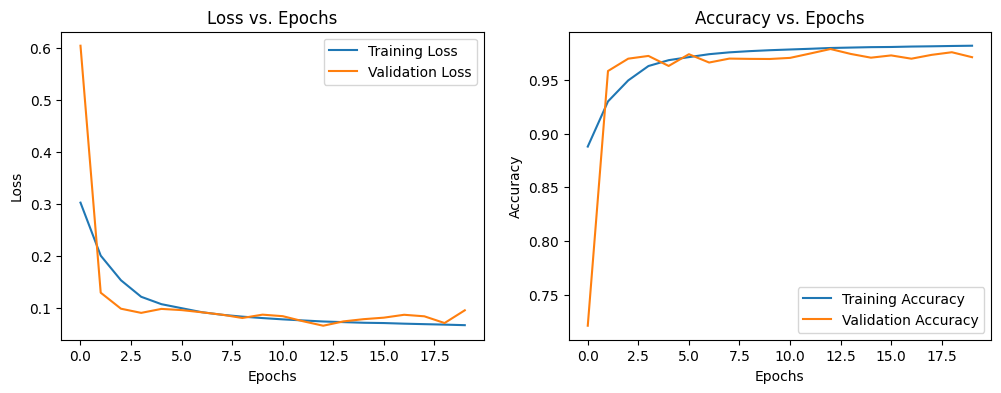

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Asignar la columna de etiquetas a AttackCod
AttackCod = df['AttackCod'].values

NIDS_features = ['L4_SRC_PORT','L4_DST_PORT', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
    'DURATION_IN', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT','SHORTEST_FLOW_PKT', 'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES',
    'DST_TO_SRC_SECOND_BYTES', 'SRC_TO_DST_AVG_THROUGHPUT','DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES','TCP_WIN_MAX_IN']  # Mantengo la lista de características como estaba

X = df[NIDS_features]

# Escalamos solo las características (X) y no las etiquetas (y)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir datos
X_train, X_temp, y_train, y_temp = train_test_split(X, AttackCod, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definición del modelo
model = keras.Sequential([
    # Primera capa LSTM con 15 neuronas, retornando secuencias para alimentar la siguiente capa LSTM
    layers.LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], 1), dropout=0.1), 
    # Tercera capa LSTM con 15 neuronas, esta vez no retorna secuencias ya que es la última capa LSTM
    layers.LSTM(16, dropout=0.1),
    # Capa de salida con 3 neuronas para la clasificación o predicción
    layers.Dense(3, activation='sigmoid')
])

# Adaptación de la métrica F1 para multiclase
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return K.mean(f1_val)

# Compilar modelo con las métricas adicionales
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_metric])

# Resumen del modelo
model.summary()

# Entrenar modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128)


# Post-procesamiento para obtener las clases
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# Gráfico de la pérdida y la precisión en el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
batch probados 32, 128, 240 mejor 128
dropout: 0.2, 0,1 mejor 0.1